In [27]:
import pandas as pd

df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv")
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [28]:
# 데이터 타입 및 결측값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [29]:
#첫열 제거
df_drop = df.drop('Unnamed: 0', axis=1)
df_drop

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [30]:
df_drop.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [31]:
#결측치 제거
df_drop.dropna(inplace=True)

In [32]:
df_drop.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [33]:
df_columns = df_drop
df_columns

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [34]:
df_columns['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [35]:
#연도 데이터 값 확인 결과
#float로 인해 보기 힘들어, int로 변경 할 것
df_columns['Year'].unique()

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.001e+03, 2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03,
       1.997e+03, 2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03, 1.984e+03,
       1.998e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00, 9.700e+01,
       1.995e+03, 1.993e+03, 2.012e+03, 1.987e+03, 1.982e+03, 1.100e+01,
       1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03, 1.983e+03,
       1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01, 6.000e+00,
       8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00, 1.000e+01,
       9.800e+01, 7.000e+00, 1.600e+01, 8.600e+01, 1.400e+01, 9.500e+01,
       2.017e+03, 1.980e+03, 2.020e+03, 2.000e+00, 1.300e+01, 0.000e+00,
       1.200e+01, 9.400e+01])

In [36]:
df_columns['Year'] = df_columns['Year'].astype(int)

In [37]:
#결과 확인
#4자리 외는 drop할 것인가? 살릴 것인가?
#한번에 drop 할 방법 찾기
df_columns['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980, 2020,    2,   13,    0,   12,   94])

In [38]:
import operator as index

df_columns_1 = df_columns[df_columns['Year'] < 100].index
df_columns = df_columns.drop(df_columns_1)
df_columns['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [39]:
df_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16141 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16141 non-null  object
 1   Platform     16141 non-null  object
 2   Year         16141 non-null  int64 
 3   Genre        16141 non-null  object
 4   Publisher    16141 non-null  object
 5   NA_Sales     16141 non-null  object
 6   EU_Sales     16141 non-null  object
 7   JP_Sales     16141 non-null  object
 8   Other_Sales  16141 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [40]:
#컬럼별 이상치 확인
df_columns['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [41]:
df_columns['Publisher'].unique()

array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Eidos Interactive', 'Microsoft Game Studios',
       'Nippon Ichi Software', 'Kalypso Media', 'Electronic Arts',
       'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'Infogrames', 'GT Interactive', 'Storm City Games',
       'Gathering of Dev

In [42]:
df_columns['NA_Sales'].unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K',
       '0.13', '0.34', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98', '0.75',
       '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68', '1.23M',
       

In [43]:
def column_cleaning(col):
  temp_list = []

  for i in col:
    words = i.split()
    for word in words:
      if "M" in word:
        temp = float(i.replace("M", ""))  # float로 변환합니다. 
        temp_list.append(temp)  # 최종 변환한 데이터를 리스트에 추가합니다.
      elif "K" in word:
        temp = float(i.replace("K", ""))*0.001  # float로 변환합니다. 
        temp_list.append(temp)  # 최종 변환한 데이터를 리스트에 추가합니다.
      else :
        temp = float(i)  # float로 변환합니다. 
        temp_list.append(temp)  # 최종 변환한 데이터를 리스트에 추가합니다.

  return temp_list # 함수의 결과로 리스트를 반환합니다.

In [44]:
df_columns['NA_Sales'] = column_cleaning(df_columns['NA_Sales'])
df_columns['NA_Sales']

0        0.04
1        0.17
2        0.00
3        0.04
4        0.12
         ... 
16593    0.15
16594    0.01
16595    0.44
16596    0.05
16597    0.00
Name: NA_Sales, Length: 16141, dtype: float64

In [45]:
#11번째 행 K 제거 확인
df_columns['NA_Sales'].iloc[:12]

0     0.04
1     0.17
2     0.00
3     0.04
4     0.12
5     0.00
6     0.02
7     0.07
8     0.00
9     0.04
10    0.48
11    0.14
Name: NA_Sales, dtype: float64

In [46]:
df_columns['EU_Sales'] = column_cleaning(df_columns['EU_Sales'])
df_columns['JP_Sales'] = column_cleaning(df_columns['JP_Sales'])
df_columns['Other_Sales'] = column_cleaning(df_columns['Other_Sales'])
df_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16141 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16141 non-null  object 
 1   Platform     16141 non-null  object 
 2   Year         16141 non-null  int64  
 3   Genre        16141 non-null  object 
 4   Publisher    16141 non-null  object 
 5   NA_Sales     16141 non-null  float64
 6   EU_Sales     16141 non-null  float64
 7   JP_Sales     16141 non-null  float64
 8   Other_Sales  16141 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [47]:
#전처리 완료
df_final = df_columns.reset_index()
df_final = df_final.drop('index', axis=1)
df_final

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16137,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16138,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16139,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [79]:
df_final.to_csv("./df_fanal.csv", index=True)

In [ ]:
#df = pd.read_csv("")

In [48]:
df_final.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [97]:
#지역에 따라서 선호하는 게임 장르가 다를까?
#지역(출고량)별 장르 평균 비교, (함수 뭐 쓸지) 열 내에서 sorting 하는 방법

import numpy as np
import matplotlib.pyplot as plt

#count, sum, mean을 비교해 보았고 sum이 출고량을 나타내기 적합하다고 판단
df_subset = df_final

df_NA = df_subset.groupby('Genre').NA_Sales.sum()
df_EU = df_subset.groupby('Genre').EU_Sales.sum()
df_JP = df_subset.groupby('Genre').JP_Sales.sum()
df_Other = df_subset.groupby('Genre').Other_Sales.sum()

In [114]:
df_NA

Genre
Action          855.96
Adventure       101.33
Fighting        220.11
Misc            394.29
Platform        442.46
Puzzle          121.00
Racing          353.57
Role-Playing    307.08
Shooter         570.89
Simulation      181.04
Sports          664.33
Strategy         67.82
Name: NA_Sales, dtype: float64

In [124]:
df_NA_rank = df_NA.rank(axis=0, ascending=False)
df_EU_rank = df_EU.rank(axis=0, ascending=False)
df_JP_rank = df_JP.rank(axis=0, ascending=False)
df_Other_rank = df_Other.rank(axis=0, ascending=False)

In [127]:
print(df_NA_rank)
print(df_EU_rank)
print(df_JP_rank)
print(df_Other_rank)

Genre
Action           1.0
Adventure       11.0
Fighting         8.0
Misc             5.0
Platform         4.0
Puzzle          10.0
Racing           6.0
Role-Playing     7.0
Shooter          3.0
Simulation       9.0
Sports           2.0
Strategy        12.0
Name: NA_Sales, dtype: float64
Genre
Action           1.0
Adventure       10.0
Fighting         9.0
Misc             5.0
Platform         6.0
Puzzle          11.0
Racing           4.0
Role-Playing     7.0
Shooter          3.0
Simulation       8.0
Sports           2.0
Strategy        12.0
Name: EU_Sales, dtype: float64
Genre
Action           2.0
Adventure       10.0
Fighting         6.0
Misc             5.0
Platform         4.0
Puzzle           8.0
Racing           9.0
Role-Playing     1.0
Shooter         12.0
Simulation       7.0
Sports           3.0
Strategy        11.0
Name: JP_Sales, dtype: float64
Genre
Action           1.0
Adventure       10.0
Fighting         8.0
Misc             5.0
Platform         7.0
Puzzle          11.0
R

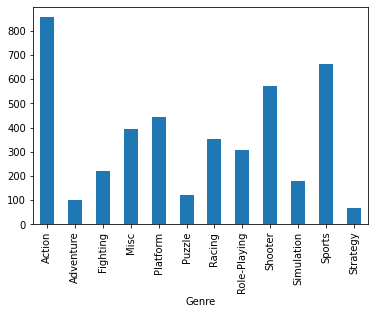

In [115]:
df_NA.plot.bar()

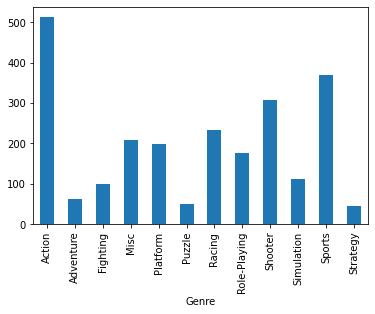

In [116]:
df_EU.plot.bar()

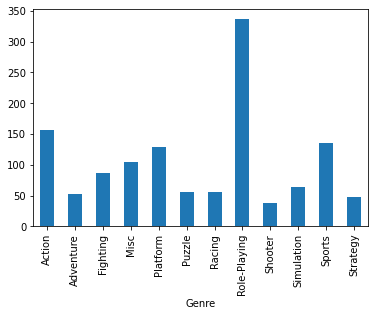

In [117]:
df_JP.plot.bar()

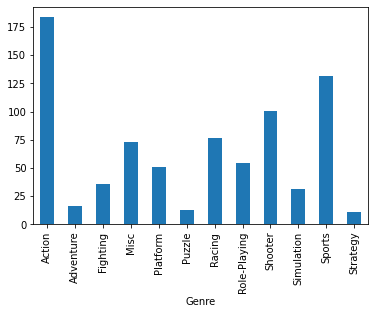

In [118]:
df_Other.plot.bar()

In [130]:
df_final['Sales'] = df_final['NA_Sales'] + df_final['EU_Sales'] + df_final['JP_Sales'] + df_final['Other_Sales']

In [131]:
df_final

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16137,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16138,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16139,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [148]:
df_Year = df_final

df_trend = df_Year.groupby(['Year', 'Genre'], as_index=False).agg("sum").filter(['Year', 'Genre', 'Sales'])
df_trend

,Year,Genre,Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
...,...,...,...
383,2016,Sports,14.46
384,2016,Strategy,0.52
385,2017,Action,0.01
386,2017,Role-Playing,0.04


In [149]:
df_trend_1 = pd.pivot_table(df_trend, values='Sales', index='Year', columns='Genre')

In [150]:
df_trend_1

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,NaN,0.77,2.70,NaN,NaN,NaN,NaN,7.07,NaN,NaN,NaN
1981,14.79,NaN,NaN,NaN,6.92,2.25,0.48,NaN,10.02,0.44,0.78,NaN
1982,6.50,NaN,NaN,0.87,5.03,10.04,1.57,NaN,3.81,NaN,1.06,NaN
1983,2.86,0.40,NaN,2.14,6.93,0.78,NaN,NaN,0.49,NaN,3.20,NaN
1984,1.85,NaN,NaN,1.45,0.69,3.14,5.95,NaN,31.10,NaN,6.17,NaN
1985,3.52,NaN,1.05,NaN,43.17,3.21,NaN,NaN,1.00,0.04,1.96,NaN
1986,13.74,NaN,NaN,NaN,8.34,NaN,1.96,2.52,3.89,NaN,5.58,NaN
1987,1.11,4.38,5.42,NaN,1.74,NaN,NaN,4.65,0.69,NaN,3.71,NaN
1988,1.74,NaN,NaN,NaN,27.73,5.58,2.14,5.88,0.51,0.03,3.60,NaN


In [152]:
df_trend_1.isnull().sum()

Genre
Action           1
Adventure       11
Fighting        10
Misc             8
Platform         3
Puzzle           6
Racing           7
Role-Playing     7
Shooter          3
Simulation       8
Sports           3
Strategy        13
dtype: int64

In [155]:
df_trend_1.fillna(0, inplace=True)

In [156]:
df_trend_1.isnull().sum()

Genre
Action          0
Adventure       0
Fighting        0
Misc            0
Platform        0
Puzzle          0
Racing          0
Role-Playing    0
Shooter         0
Simulation      0
Sports          0
Strategy        0
dtype: int64

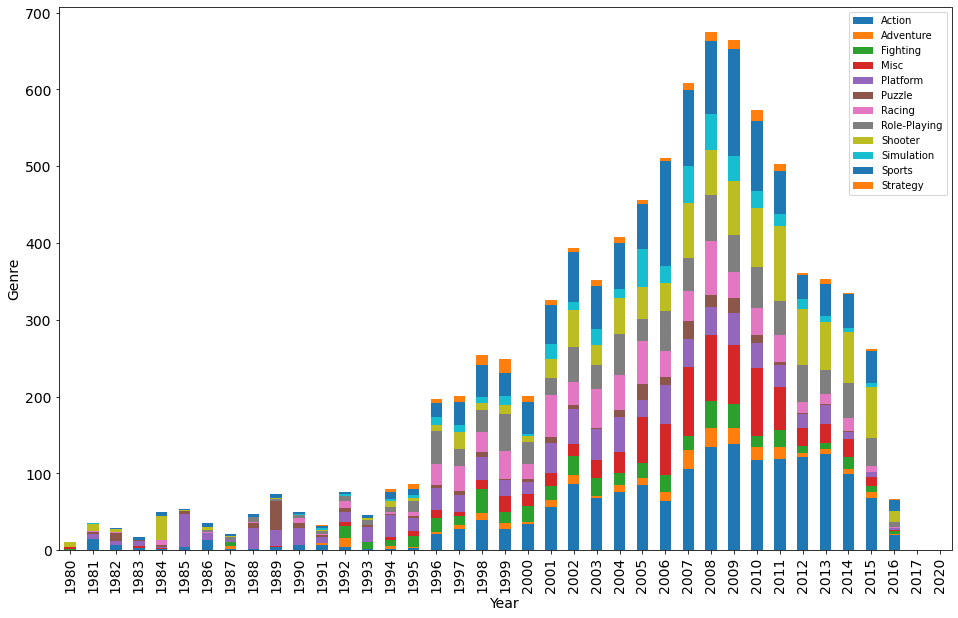

In [160]:
df_trend_1.plot(kind='bar', stacked=True, figsize=[16, 10], fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.legend()

1980년 초반에는 에서 후반까지 슈팅 게임과 퍼즐게임, 플랫폼
1990년 중반부터 게임 산업이 발전하면서 전체 매출이 증가하면서 액션, 스포츠, 미스크 등의 게임이 트렌드를 이끌어가기 시작함

In [168]:
df_game = df_final

In [196]:
df_game_1 = df_game.groupby('Name').sum().filter(['Name', 'Sales'])
df_game_1

,Sales
Name,
'98 Koshien,0.40
.hack//G.U. Vol.1//Rebirth,0.17
.hack//G.U. Vol.2//Reminisce,0.23
.hack//G.U. Vol.2//Reminisce (jp sales),0.16
.hack//G.U. Vol.3//Redemption,0.17
...,...
thinkSMART FAMILY!,0.03
thinkSMART: Chess for Kids,0.01
uDraw Studio,2.45


In [198]:
df_top = df_game_1.sort_values(by='Sales', ascending=False).reset_index()
df_top

,Name,Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.83
...,...,...
11233,East India Company,0.01
11234,Star Trek: Legacy,0.01
11235,Monkey Madness: Island Escape,0.01
11236,Resident Evil 5 HD,0.01


In [199]:
df_top5 = df_top.iloc[:5]
df_top5

,Name,Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.83


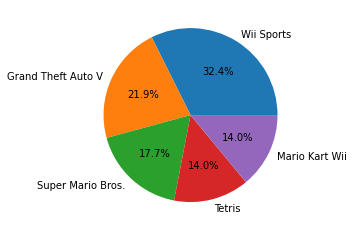

In [202]:
#출고량이 높은 게임의 상위 5개 보는 이유(전체를 안보는 이유)
#row가 너무 많아서 그래프가 복잡
#wii Sports가 1위, Grand Theft Auto가 2위를 나타냄
plt.pie(df_top5['Sales'], labels=df_top5['Name'], autopct='%.1f%%')
plt.show()

In [204]:
df_trend_1

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,0.00,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.00,0.00
1981,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.00
1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.00
1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.00
1984,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.00
1985,3.52,0.00,1.05,0.00,43.17,3.21,0.00,0.00,1.00,0.04,1.96,0.00
1986,13.74,0.00,0.00,0.00,8.34,0.00,1.96,2.52,3.89,0.00,5.58,0.00
1987,1.11,4.38,5.42,0.00,1.74,0.00,0.00,4.65,0.69,0.00,3.71,0.00
1988,1.74,0.00,0.00,0.00,27.73,5.58,2.14,5.88,0.51,0.03,3.60,0.00


In [214]:
df_total_sales = df_final.groupby('Genre').sum().filter(['Genre', 'Sales'])
df_total_sales

,Sales
Genre,
Action,1707.85
Adventure,233.08
Fighting,442.32
Misc,778.22
Platform,822.23
Puzzle,239.97
Racing,719.42
Role-Playing,874.35
Shooter,1016.31


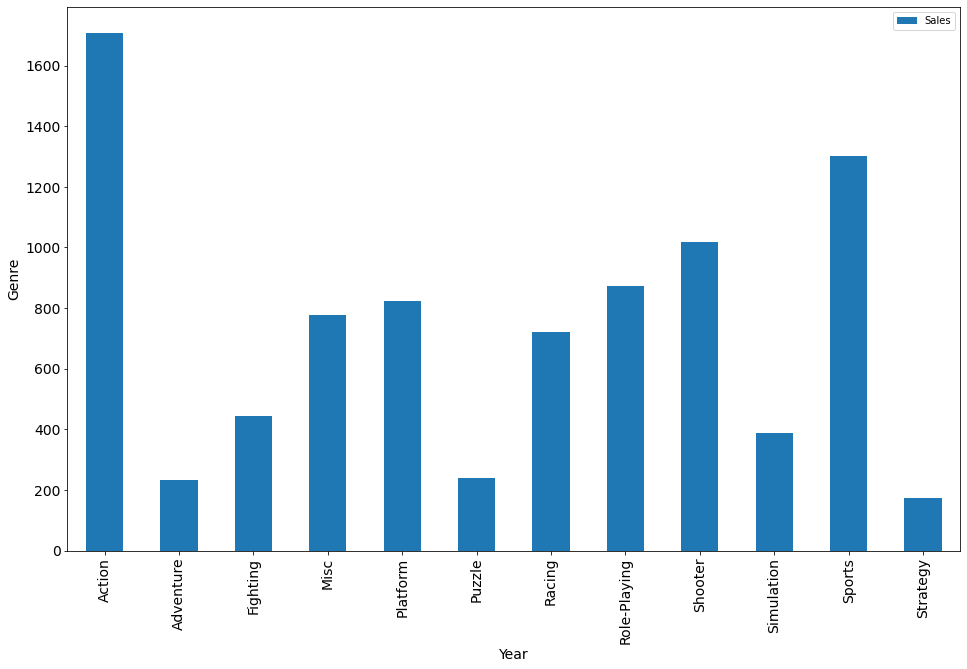

In [216]:
df_total_sales.plot(kind='bar', figsize=[16, 10], fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.legend()

In [229]:
#평균매출 살펴보기
df_total_sales_mean = df_final.groupby('Genre').mean().filter(['Genre', 'Sales'])
df_total_sales_mean

,Sales
Genre,
Action,0.529402
Adventure,0.184399
Fighting,0.533559
Misc,0.465721
Platform,0.950555
Puzzle,0.430054
Racing,0.595054
Role-Playing,0.600103
Shooter,0.801506


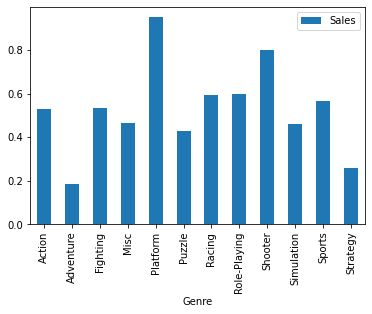

In [230]:
df_total_sales_mean.plot.bar()

In [ ]:
df_NA_mean = df_subset.groupby('Genre').NA_Sales.mean()
df_EU_mean = df_subset.groupby('Genre').EU_Sales.mean()
df_JP_mean = df_subset.groupby('Genre').JP_Sales.mean()
df_Other_mean = df_subset.groupby('Genre').Other_Sales.mean()

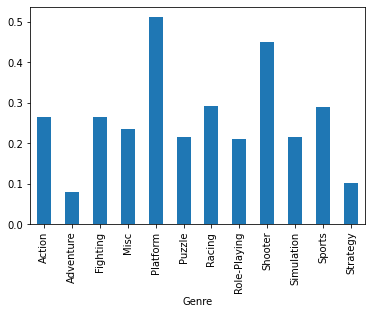

In [ ]:
df_NA_mean.plot.bar()

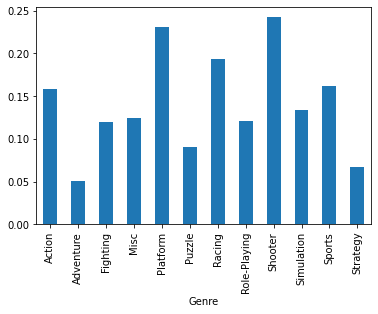

In [ ]:
df_EU_mean.plot.bar()

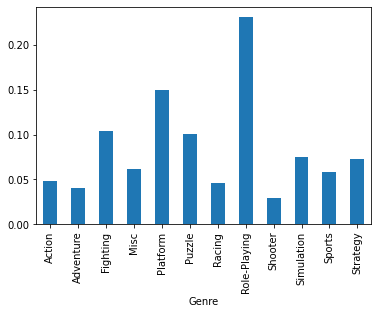

In [ ]:
df_JP_mean.plot.bar()

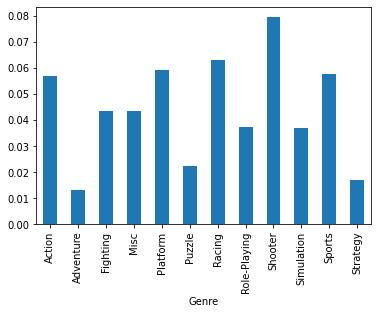

In [ ]:
df_Other_mean.plot.bar()